<a href="https://colab.research.google.com/github/fightmeat/Machine_Leaning/blob/main/19_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시계열 분석
1. 시계열 데이터란
- 시간에 순차적으로 관측된 값들의 집합
- 예측 모델에서 시간을 변수로 사용하는 특징을 가진 데이터
2. 시계열 데이터 분석이란
- 과거 데이터의 패턴을 분석하여 미래의 값을 예측하는 방법
- 과거의 패턴이 미래에도 지속된다는 안정성을 기본적인 가정으로 구현한다.
3. 시계열 분해법이란
- 시계열 데이터를 추세/순환/계절/불규칙 요소로 분해하는 기법
- 추세(Trend) : 데이터가 장기적으로 증가하거나 감소하는 것이며, 추세가 꼭 선형적일 필요는 없다.
- 순환(Cycle) : 정치, 경제, 사회적인 요인에 의해 변화하는 것
- 계절성(Seasonal) : 특정 시간을 주기로 나타내는 패턴
- 불규칙요소 : 가까운 상황을 분석할 때 효율이 좋다.


# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 데이터 셋 로딩

- Data Source : https://www.blockchain.com/explorer/charts/market-price

In [2]:
bitcoin = pd.read_csv('market-price.csv', names=['day', 'price'])

## 탐색적 데이터 분석(EDA)

In [3]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     361 non-null    object 
 1   price   361 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
# tail()
bitcoin.tail()

,day,price
356,2022/06/21 0:00,20582.29
357,2022/06/22 0:00,20703.51
358,2022/06/23 0:00,19953.71
359,2022/06/24 0:00,21088.30
360,2022/06/25 0:00,21194.68


In [5]:
# 시계열 데이터로 변환
bitcoin['day'] = pd.to_datetime(bitcoin['day'])
bitcoin.set_index('day', inplace=True)
bitcoin.head()

,price
day,
2021-06-30,35847.70
2021-07-01,35047.36
2021-07-02,33536.88
2021-07-03,33856.86
2021-07-04,34688.98


In [6]:
bitcoin.describe()

,price
count,361.000000
mean,43290.492022
std,10049.245982
min,18977.510000
25%,37661.190000
50%,42723.370000
75%,48392.790000
max,67562.170000


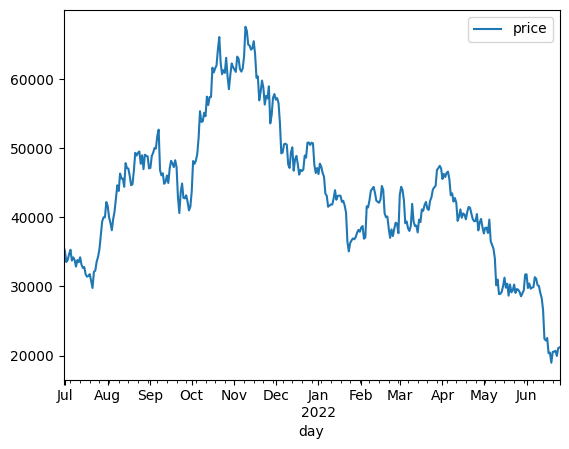

In [7]:
bitcoin.plot()
plt.show()

# 시계열 예측 모델: ARIMA

1. ARIMA(AutoRegressive Intergrated Moving Average) : AR모형과 MA모형을 합친것
  - AR : 자기 상관성 정보에 기반을 둔 모델로 자기 자신의 과거를 정보로 사용한다는 개념
  - MA : 어떤 변수의 평균값이 지속적으로 증가하거나 감소하는 경향에 대한 것으로 이전 항에서의 오차를 이용하여 현재 항의 상태를 추론하는 모형
  - ARMA 모형에 비정상성을 제거하는 과정을 포함한 것이 ARIMA, ARMA 모델에 추세 변동의 경향까지 반형한 것이 ARIMA 모형
2. ARIMA 모형은 시계열 데이터의 정상성(Stationary)를 가정한다.
  - 정상성 : 평균, 분산이 시간에 따라 일정한 성질을 말한다.(즉, 시간의 흐름에 따라 변하지 않음을 의미한다.)
  - 추세나 계절성이 있는 시계열은 정상 시계열이 아니다. 이렇듯 정상성을 나타내지 않는 데이터는 복잡한 패턴을 가지고 있어서 모델링하여 분석하기 어렵기 때문에 정상성을 갖도록 로그변환, 차분등의 전처리 작업을 수행한 후 분석한다.
  - 변동폭이 일정하지 않는 경우 : 로그변환
  - 추세, 계절성이 존재하는 경우 : 차분(differencing)

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# order(AR, d, MA)
# AR : 몇번째 과거까지 학습할것인지
# d : 차분횟수
# MA : 오차갯수, q
model = ARIMA(bitcoin.price.values, order=(2, 1, 2))
model_fit = model.fit()
model_fit

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# 요약보고서
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  361
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3145.235
Date:                Thu, 12 Oct 2023   AIC                           6300.470
Time:                        07:22:23   BIC                           6319.900
Sample:                             0   HQIC                          6308.196
                                - 361                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3574      0.009     40.728      0.000       0.340       0.375
ar.L2         -0.9910      0.008   -127.748      0.000      -1.006      -0.976
ma.L1         -0.3760      0.017    -21.935      0.000      -0.410      -0.342
ma.L2          0.9980      0.051     19.735      0.000       0.899       1.097
sigma2      2.358e+06   1.52e-08   1.55e+14      0.000    2.36e+06    2.36e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                26.57
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -0.19
Prob(H) (two-sided):                  0.09   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.47e+28. Standard errors may be unstable.
"""

- order(AR=p, d, MA=q)
- 일반적으로 p + q < 2 , p * q = 0
- p와 d, q를 추정할 때 사용하는 ACF plot와 PACF plot를 통해 최적의 모수를 찾아낸다.
- AIC(Akaike's Information Criterion) : 일반적인 회귀분석에 쓰이는 지표로 주어진 데이터셋에 대한 모델의 상대적 품질을 평가하는 값으로 AIC값이 낮을수록 좋다고 본다.
- BIC(Bayes Information Criteria) : AIC의 단점이 표본의 크기가 커질수록 부정확해진다는 것을 보완한 지표
- AIC, BIC를 최소화한다는 것은 우도(likelihood)를 가장 크게 하는 동시에 변수 갯수는 가장 적은 최적의 모델을 의미한다.

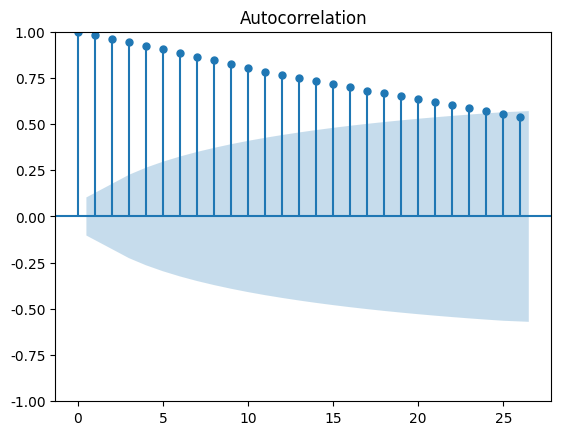

In [10]:
# ACF plot와 PACF plot는 시계열 데이터의 정상성 평가와 ARIMA 모델 파라미터(p, d, q)의 최적의 값을 찾는 역할
# 현재의 값이 과거값과 어떤 관계성을 가지고 있는지를 보여준다.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# p : AR 모형의 차수, q : MA 모형의 차수
plot_acf(bitcoin)
plt.show()

### 그래프 해석
- y축의 값들은 ACF, PACF값을 수치화한 것이고, 시차에 따른 일련의 자기상관을 자기상관함수(ACF)라고 한다.
- ACF는 시차에 따른 관측값 간의 연관 정도를 보여주며, 시차가 커질수록 ACF는 점차 0에 가까워진다.
- ACF는 시계열의 정상성을 평가할 때 유용한다. 정상 시계열의 경우 ACF는 상대적으로 빨리 0으로 접근한다.
- 비정상 시계열의 경우 ACF는 천천히 감소하며 종종 큰 양의 값을 가진다.
- 왼쪽으로부터 첫번째 바는 x가 0인데 이를 현재값이라고 생각하면 된다.
- ACF, PACF의 값이 x가 0일때 무조건 1로 나온다.
- X값이 2이면 2개 전의 값을 말한다.

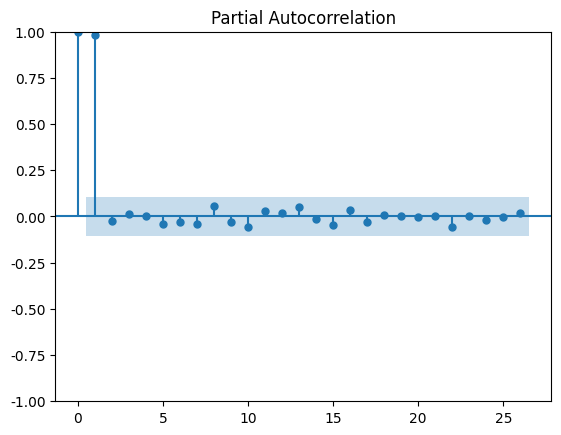

In [11]:
plot_pacf(bitcoin)
plt.show()

그래프 해석
- 실핀처럼 보이는 bar들이 파란색 박스안에 들어가게 되면 그때부터 값이 통계적으로 significant(중요)하지 않다고 본다.
- ACF 그래프의 모양이 점점 작아지고, PACF 그래프에서 p개 바 뒤에 그래프가 끊긴다면 AR모델이 적합한 것이고,p값을 AR모델의 파라미터로 쓴다.
- PACF 그래프에서 첫 값으로부터 1개 뒤 이후부터 파란상자 안에 값이 들어가면 그래프가 끊기는 것을 볼 수 있다. 이로부터 이 데이터셋을 사용할 때는 AR(1)모델을 활용하는 것이 가장 정확도가 높을 것이라고 유추할 수 있다.

최적의 (p, d, q)값을 찾는 작업
- 가장 일반적인 가능한 모든(p,d,q)값을 돌려보고 가장 높은 정확도를 주는 쌍을 고르는 것이다.
- AIC값을 찾아서 가장 낮은 값을 선택한다.

In [11]:
import itertools

p=d=q=range(0,5)
pdq= list(itertools.product(p,d,q))

for param in pdq:
  try:
    model_arima = ARIMA(bitcoin.price.values, order=param)
    model_arima_fit = model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
    continue

- 가장 최적의 파라미터 : (2,1,2) 6300

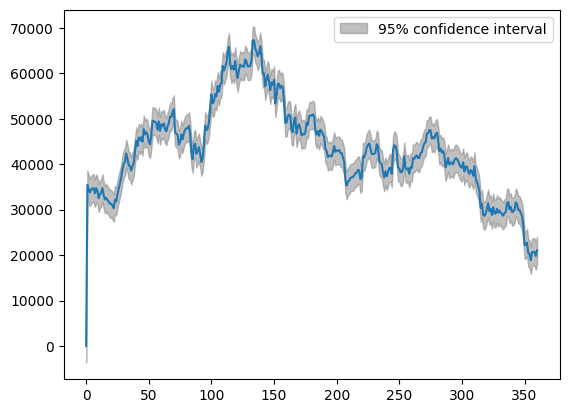

In [13]:
# ARIMA 모델의 학습 결과를 시각화
from statsmodels.graphics.tsaplots import plot_predict

model = ARIMA(bitcoin.price.values, order=(2,1,2))
# model_fit = model_fit()
# print(model_fit.summary())
# 학습 데이터에 대한 예측 결과 : 첫번째 그래프
fig = sm.graphics.tsa.plot_predict(model_fit)

In [ ]:
# 잔차(실측값-예측값)의 변동을 시각화하기 위한 데이터프레임
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.ylim(-5000,7000)
plt.show()

## ARIMA 모델 평가
- model_fit.forecast(steps=5)

In [ ]:
# 테스트 데이터셋 로딩
# y : 종속변수, target
# 실제 가격
test = pd.read_csv('market-price-test.csv', names=['ds','y'])

# 학습한 모델을 이용해서 5일뒤에 값을 예측한다.
# 예측 가격
predict = model_fit.forecast(steps=5)
predict = pred.tolist()

# 모델이 예측한 상한값(pred_y_upper), 하한값(pred_y_lower)
pred_y = predict.tolist()
test_y = test.y.values

pred_y_lower = []
pred_y_upper = []

for lower_upper in predict:
  lower = lower_upper[0]
  upper = lower_upper[1]

  pred_y_lower.append(lower)

In [14]:
plot.plot(pred_y, color='gold')
plot.plot(test_y, color='green')
plt.show()

NameError: ignored

In [ ]:
# RMSE(Root Mean Square Error)
# 모델의 예측값과 실제값의 차이를 하나의 숫자로 표현한 것
# 예측값과 실제값을 뺸 후 제곱시킨 값을 다 더하고, N으로 나눈 후 루트를 씌운값
# 평균제곱근편차, 낮을수록 정확도가 높다고 판단한다.
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(pred_y, test_y))
rmse

## Grid Search
- 최적의 파라미터를 찾기 위해 범위를 이용하여 계산하는 것
- 데이터의 주기성을 고려한 모델이 SARIMAX 모델을 이용한다.
- 페이스북에서 시계열데이터의 트랜드 예측을 분석하는 모델 prophet

In [16]:
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# progress bar로 표현하는 패키지
p = range(0,3)
d = range(1,2)
q = range(0,6)

pdq = list(itertools.product(p, d, q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
  for i in pdq:
    pg.update(1)
    try:
      model=SARIMAX(bitcoin.price.values, order=(i))
      model_fit = model.fit()
      aic.append(round(model_fit.aic, 2))
      params.append(i)
    except:
      continue

In [ ]:
# 18개의 파라미터
optimal = [(params[i],j) for i, j in enumerate(aic,1) if j == min(aic)]

model_opt = SARIMAX(bitcoin.price.values, order=optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

https://github.com/facebook/prophet